<a href="https://colab.research.google.com/github/korepuswapna/Default-Credit-Card-Clients/blob/main/Programming%20code%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
# Load the dataset
data = pd.read_csv('/content/default of credit card clients dataset.csv', header=1)

In [6]:
data.head()

,1,20000,2,2.1,1.1,24,2.2,2.3,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.2
0,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       29999 non-null  int64
 1   20000   29999 non-null  int64
 2   2       29999 non-null  int64
 3   2.1     29999 non-null  int64
 4   1.1     29999 non-null  int64
 5   24      29999 non-null  int64
 6   2.2     29999 non-null  int64
 7   2.3     29999 non-null  int64
 8   -1      29999 non-null  int64
 9   -1.1    29999 non-null  int64
 10  -2      29999 non-null  int64
 11  -2.1    29999 non-null  int64
 12  3913    29999 non-null  int64
 13  3102    29999 non-null  int64
 14  689     29999 non-null  int64
 15  0       29999 non-null  int64
 16  0.1     29999 non-null  int64
 17  0.2     29999 non-null  int64
 18  0.3     29999 non-null  int64
 19  689.1   29999 non-null  int64
 20  0.4     29999 non-null  int64
 21  0.5     29999 non-null  int64
 22  0.6     29999 non-null  int64
 23  0.7     299

# New Section

In [8]:
#changing the columns names
column_names_mapping = {
    '1': 'ID',
    '20000': 'LIMIT_BAL',
    '2': 'SEX',
    '2.1': 'EDUCATION',
    '1.1': 'MARRIAGE',
    '24': 'AGE',
    '2.2': 'PAY_1',
    '2.3': 'PAY_2',
    '-1': 'PAY_3',
    '-1.1': 'PAY_4',
    '-2': 'PAY_5',
    '-2.1': 'PAY_6',
    '3913': 'BILL_AMT1',
    '3102': 'BILL_AMT2',
    '689': 'BILL_AMT3',
    '0': 'BILL_AMT4',
    '0.1': 'BILL_AMT5',
    '0.2': 'BILL_AMT6',
    '0.3': 'PAY_AMT1',
    '689.1': 'PAY_AMT2',
    '0.4': 'PAY_AMT3',
    '0.5': 'PAY_AMT4',
    '0.6': 'PAY_AMT5',
    '0.7': 'PAY_AMT6',
    '1.2': 'Payments'
    # Add more mappings as needed
}
data = data.rename(columns=column_names_mapping)
print(data)
data.info()


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          2     120000    2          2         2   26     -1      2      0   
1          3      90000    2          2         2   34      0      0      0   
2          4      50000    2          2         1   37      0      0      0   
3          5      50000    1          2         1   57     -1      0     -1   
4          6      50000    1          1         2   37      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29994  29996     220000    1          3         1   39      0      0      0   
29995  29997     150000    1          3         2   43     -1     -1     -1   
29996  29998      30000    1          2         2   37      4      3      2   
29997  29999      80000    1          3         1   41      1     -1      0   
29998  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [9]:
#Checking Statistics of Data
data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,167489.238975,1.603720,1.853128,1.551885,35.485883
std,129747.029798,0.489132,0.790361,0.521969,9.217819
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [10]:
# Find duplicates
print("Shape of dataset before removing duplicates:", data.shape)

duplicate = data[data.duplicated(keep='last')]

data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:", data.shape)


Shape of dataset before removing duplicates: (29999, 25)
Shape of dataset after removing duplicates: (29999, 25)


In [11]:
#Find the missing value and count of missing values
missing_values = data.isnull()
print(missing_values)

missing_count = data.isnull().sum()
print(missing_count)


          ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False  False  False   
3      False      False  False      False     False  False  False  False   
4      False      False  False      False     False  False  False  False   
...      ...        ...    ...        ...       ...    ...    ...    ...   
29994  False      False  False      False     False  False  False  False   
29995  False      False  False      False     False  False  False  False   
29996  False      False  False      False     False  False  False  False   
29997  False      False  False      False     False  False  False  False   
29998  False      False  False      False     False  False  False  False   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     

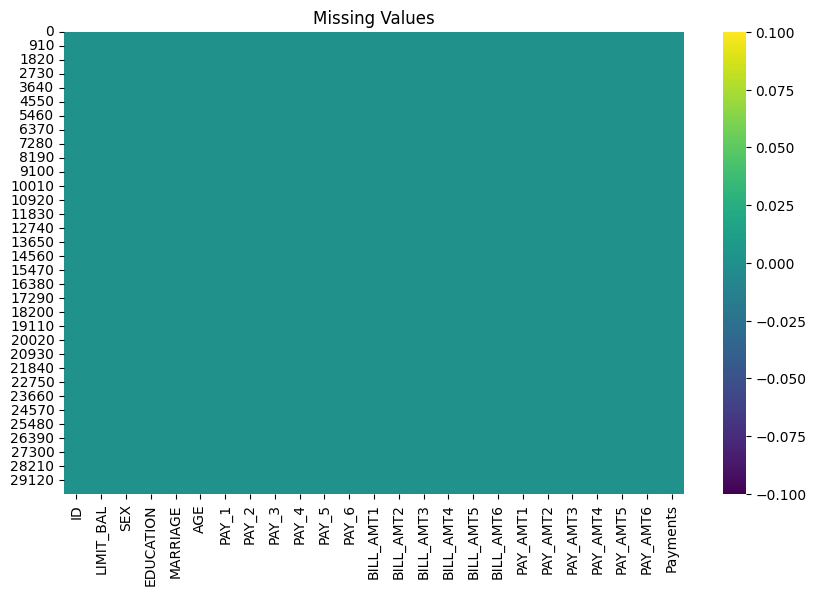

In [12]:
#Plotting the Missing values

plt.figure(figsize=(10, 6))

sns.heatmap(missing_values, cmap='viridis')

plt.title('Missing Values')

plt.show()


In [13]:
#History of Past Payments
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,-0.016767,-0.133838,-0.166172,-0.220641,-0.266142,-0.291043
std,1.123760,1.197143,1.196878,1.169149,1.133162,1.149964
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [64]:
#Amount of Bill Statement and Previous Payment
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000
mean,51224.907964,49180.611120,4.701470e+04,43264.391113,40312.744725,38873.056169
std,73636.581260,71174.457875,6.935003e+04,64333.443473,60797.723604,59554.677258
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.500000,2984.500000,2.667500e+03,2328.000000,1763.500000,1256.000000
50%,22382.000000,21203.000000,2.008900e+04,19052.000000,18105.000000,17074.000000
75%,67092.000000,64008.500000,6.016550e+04,54509.000000,50196.000000,49200.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [65]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,5663.769292,5.921338e+03,5225.855695,4826.237741,4799.547618,5215.676423
std,16563.524146,2.304123e+04,17607.229085,15666.396081,15278.535203,17777.736580
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.000000,296.000000,253.500000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.000000,4013.500000,4032.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [66]:
#Extract the categorical Data

target_variable = 'Payments'

y = data[target_variable]

# Extract the features (input variables) from the dataset

X= data.drop('Payments', axis=1)

# Extract the target variable (label) from the dataset

y = data['Payments']

# Identify the categorical columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Extract the categorical data
categorical_data = data[categorical_columns]

# Optional: Convert numerical columns that represent categories into strings
categorical_data = categorical_data.astype(str)

# Print the categorical data
print(categorical_data)



      SEX EDUCATION MARRIAGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
0       2         2        2    -1     2     0     0     0     2
1       2         2        2     0     0     0     0     0     0
2       2         2        1     0     0     0     0     0     0
3       1         2        1    -1     0    -1     0     0     0
4       1         1        2     0     0     0     0     0     0
...    ..       ...      ...   ...   ...   ...   ...   ...   ...
29994   1         3        1     0     0     0     0     0     0
29995   1         3        2    -1    -1    -1    -1     0     0
29996   1         2        2     4     3     2    -1     0     0
29997   1         3        1     1    -1     0     0     0    -1
29998   1         2        1     0     0     0     0     0     0

[29999 rows x 9 columns]


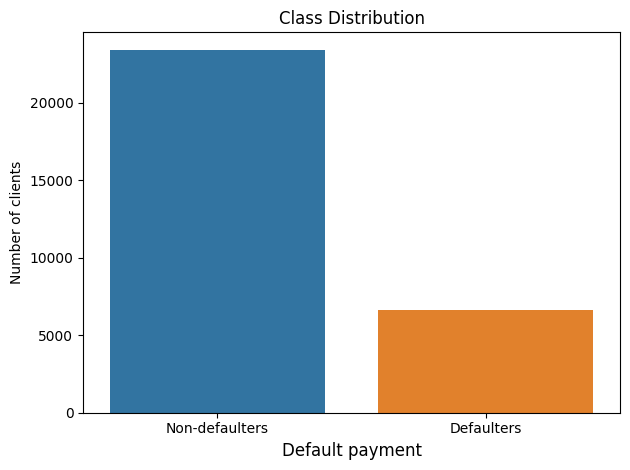

In [67]:
#Class Imbalance

# Count the occurrences of each class
class_counts = data["Payments"].value_counts()

# Plot the class distribution
sns.countplot(data=data, x="Payments")

# plt.show()
plt.title('Class Distribution')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('Default payment', fontsize=12)
plt.ylabel('Number of clients')
plt.tight_layout()
plt.show()


In [68]:
#ONEHOTENCODER
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(categorical_data)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray())

# Retrieve the feature names from the encoder
feature_names = encoder.get_feature_names_out(categorical_columns)

# Assign the feature names to the encoded DataFrame columns
encoded_df.columns = feature_names

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns from the encoded DataFrame
data_encoded.drop(columns=categorical_columns, inplace=True)

# Print the encoded dataset
print(data_encoded)

          ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          2     120000   26       2682       1725       2682       3272   
1          3      90000   34      29239      14027      13559      14331   
2          4      50000   37      46990      48233      49291      28314   
3          5      50000   57       8617       5670      35835      20940   
4          6      50000   37      64400      57069      57608      19394   
...      ...        ...  ...        ...        ...        ...        ...   
29994  29996     220000   39     188948     192815     208365      88004   
29995  29997     150000   43       1683       1828       3502       8979   
29996  29998      30000   37       3565       3356       2758      20878   
29997  29999      80000   41      -1645      78379      76304      52774   
29998  30000      50000   46      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  PAY_6_-1  PAY_6_-2  PAY_6_0  \
0           

In [69]:
#After done ONEHOTENCODER
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           29999 non-null  int64  
 1   LIMIT_BAL    29999 non-null  int64  
 2   AGE          29999 non-null  int64  
 3   BILL_AMT1    29999 non-null  int64  
 4   BILL_AMT2    29999 non-null  int64  
 5   BILL_AMT3    29999 non-null  int64  
 6   BILL_AMT4    29999 non-null  int64  
 7   BILL_AMT5    29999 non-null  int64  
 8   BILL_AMT6    29999 non-null  int64  
 9   PAY_AMT1     29999 non-null  int64  
 10  PAY_AMT2     29999 non-null  int64  
 11  PAY_AMT3     29999 non-null  int64  
 12  PAY_AMT4     29999 non-null  int64  
 13  PAY_AMT5     29999 non-null  int64  
 14  PAY_AMT6     29999 non-null  int64  
 15  Payments     29999 non-null  int64  
 16  SEX_1        29999 non-null  float64
 17  SEX_2        29999 non-null  float64
 18  EDUCATION_0  29999 non-null  float64
 19  EDUC

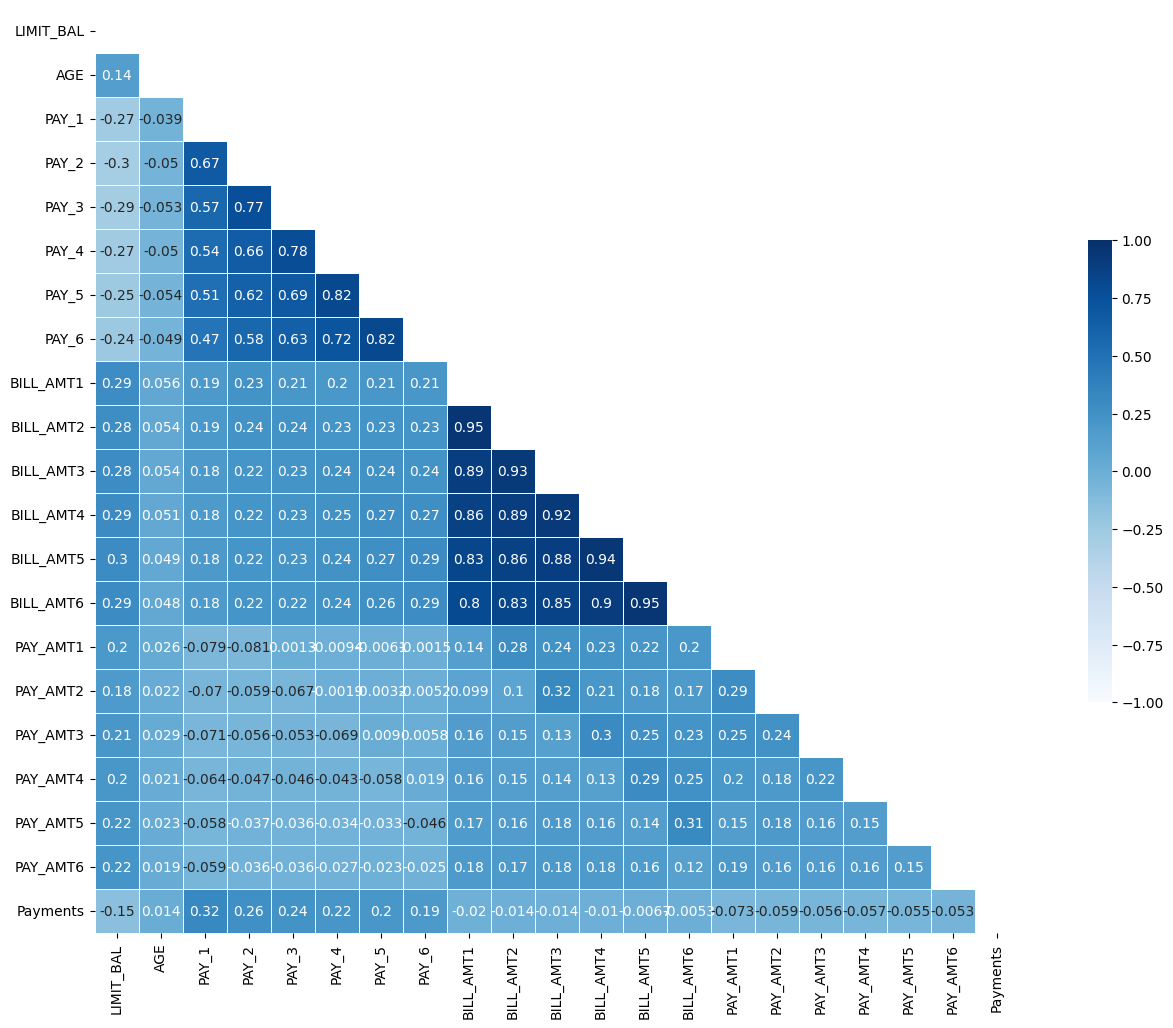

In [70]:
#Correlation Among Features
import numpy as np

numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'Payments']
corr = data[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar


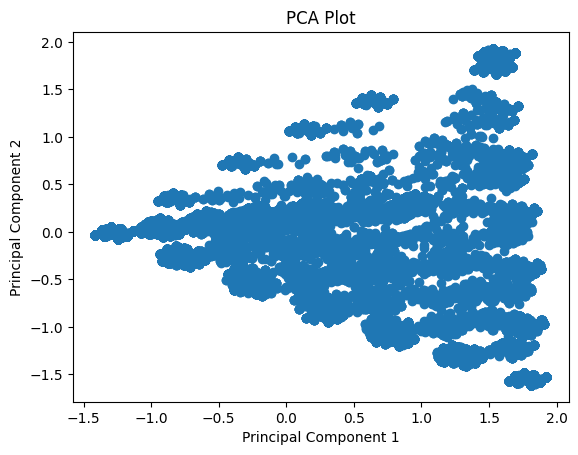

In [71]:
#APPLY PCA ON ENCODED FEATURES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])

# Apply PCA on the encoded features
pca = PCA(n_components=2)
projected_data = pca.fit_transform(encoded_data.toarray())

# Create a scatter plot of the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()



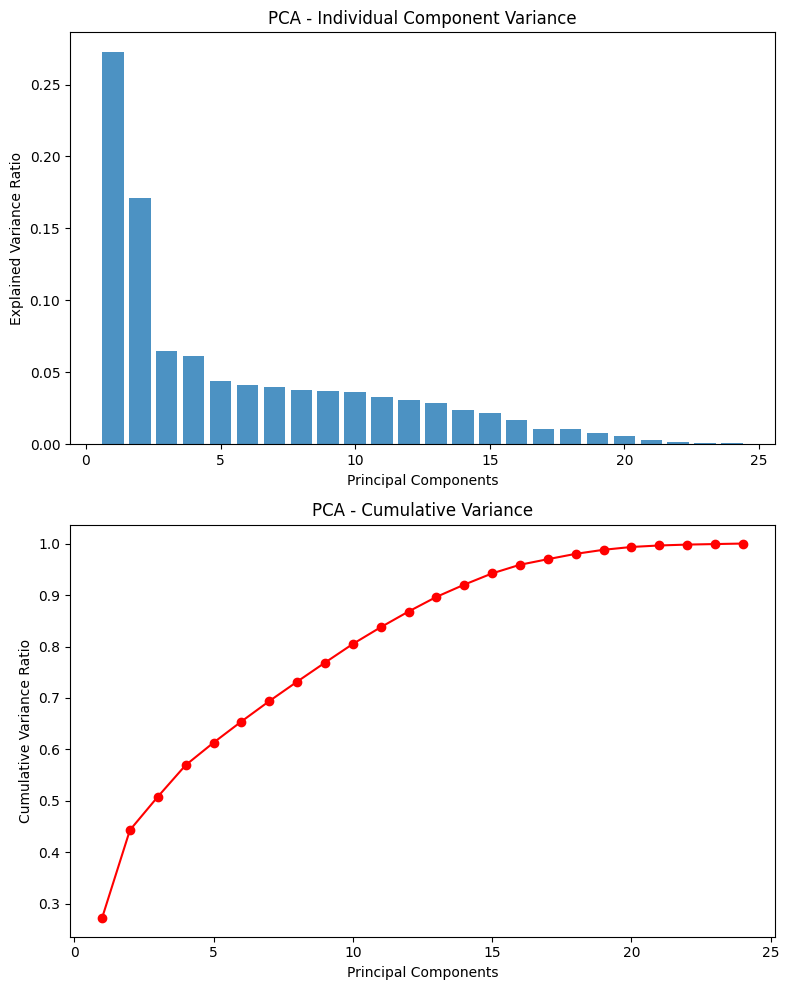

In [48]:
#PCA Individual Component Variance & Cumulative Variance for LDA

# Separate features and target
X = data.drop('Payments', axis=1)
y = data['Payments']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform LDA on PCA-transformed data
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_pca, y)

# Explained variance ratio for PCA
pca_variance = pca.explained_variance_ratio_
pca_cumulative_variance = np.cumsum(pca_variance)

# Plotting the explained variance ratio
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Bar plot for PCA individual component variance
axes[0].bar(range(1, len(pca_variance) + 1), pca_variance, alpha=0.8, align='center')
axes[0].set_xlabel('Principal Components')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('PCA - Individual Component Variance')

# Bar plot for PCA cumulative variance
axes[1].plot(range(1, len(pca_variance) + 1), pca_cumulative_variance, 'r-o')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Cumulative Variance Ratio')
axes[1].set_title('PCA - Cumulative Variance')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Payments', axis=1)
y = data['Payments']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Kernel PCA for dimensionality reduction
kpca = KernelPCA()
X_kpca = kpca.fit_transform(X_scaled)

# Perform LDA on kernel PCA-transformed data
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_kpca, y)

# Explained variance ratio for kernel PCA
kpca_variance = kpca.lambdas_ / np.sum(kpca.lambdas_)
kpca_cumulative_variance = np.cumsum(kpca_variance)

# Plotting the explained variance ratio
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Bar plot for kernel PCA individual component variance
axes[0].bar(range(1, len(kpca_variance) + 1), kpca_variance, alpha=0.8, align='center')
axes[0].set_xlabel('Principal Components')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Kernel PCA - Individual Component Variance')

# Bar plot for kernel PCA cumulative variance
axes[1].plot(range(1, len(kpca_variance) + 1), kpca_cumulative_variance, 'r-o')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Cumulative Variance Ratio')
axes[1].set_title('Kernel PCA - Cumulative Variance')

plt.tight_layout()
plt.show()


In [72]:
#RandomUndersampler
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Separate the features (X) and the target variable (y)
X = data.drop('Payments', axis=1)
y = data['Payments']

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Create a new DataFrame with the undersampled data
undersampled_data = pd.DataFrame(X_undersampled, columns=X.columns)
undersampled_data['Payments'] = y_undersampled

# Print the undersampled dataset
print(undersampled_data)



          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0       7511     380000    2          3         2   31     -1     -1     -1   
1      15326     240000    2          2         1   35     -2     -2     -2   
2      18667      50000    2          1         2   23     -1     -1     -2   
3       7495     330000    1          1         2   32      0      0      0   
4       1240      80000    2          2         1   35     -1     -1     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
13265  29992     210000    1          2         1   34      3      2      2   
13266  29995      80000    1          2         2   34      2      2      2   
13267  29998      30000    1          2         2   37      4      3      2   
13268  29999      80000    1          3         1   41      1     -1      0   
13269  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [50]:
#Oversampled
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separate the features (X) and the target variable (y)
X = data.drop('Payments', axis=1)
y = data['Payments']

# Create an instance of RandomOverSampler
ros = RandomOverSampler()

# Perform oversampling
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
oversampled_data = pd.DataFrame(X_oversampled, columns=X.columns)
oversampled_data['Payments'] = y_oversampled

# Print the oversampled dataset
print(oversampled_data)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          2     120000    2          2         2   26     -1      2      0   
1          3      90000    2          2         2   34      0      0      0   
2          4      50000    2          2         1   37      0      0      0   
3          5      50000    1          2         1   57     -1      0     -1   
4          6      50000    1          1         2   37      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
46723  10714      70000    2          2         2   23      0      0      0   
46724  17051      30000    2          2         2   22      2      2      0   
46725   4958      60000    1          1         2   27      0      0      0   
46726  11218      30000    2          2         1   31     -1      2      2   
46727  14982     300000    2          1         2   31     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [51]:
#SMOTE Oversampling

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Identify categorical columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(X, columns=categorical_columns)

# Create SMOTE instance
smote = SMOTE()

# Perform SMOTE oversampling
X_oversampled, y_oversampled = smote.fit_resample(encoded_data, y)

# Print the oversampled dataset
oversampled_data = pd.concat([X_oversampled, pd.Series(y_oversampled, name='Payments')], axis=1)
print(oversampled_data)



          ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          2     120000   26       2682       1725       2682       3272   
1          3      90000   34      29239      14027      13559      14331   
2          4      50000   37      46990      48233      49291      28314   
3          5      50000   57       8617       5670      35835      20940   
4          6      50000   37      64400      57069      57608      19394   
...      ...        ...  ...        ...        ...        ...        ...   
46723  17727      50000   39        862        862       1336       1024   
46724  16794      20000   32      13807      14121      14598      15219   
46725  21552     427818   29      75808      78306      80192      82322   
46726  12736     336225   43     332251     335765     331287     273760   
46727  11694      20000   40      11753      11279      11128      11282   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  PAY_6_-1  PAY_6_0  PAY_6_2  \
0           3

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4671
           1       0.39      0.58      0.46      1329

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.63      6000
weighted avg       0.76      0.70      0.72      6000

Classification Report (Under-Sampling):
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4671
           1       0.38      0.67      0.48      1329

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000

Classification Report (No Sampling):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4671
           1       0.59      0.34      0.43      1329

    accuracy                           0.80      6000
   macro avg       0

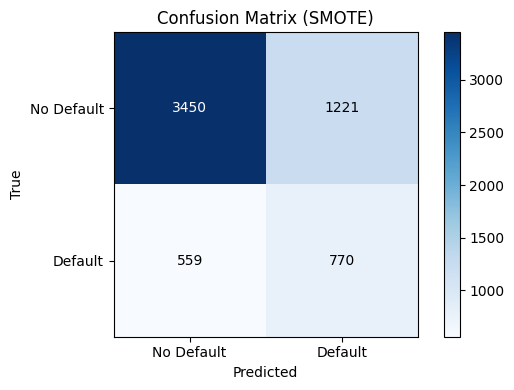

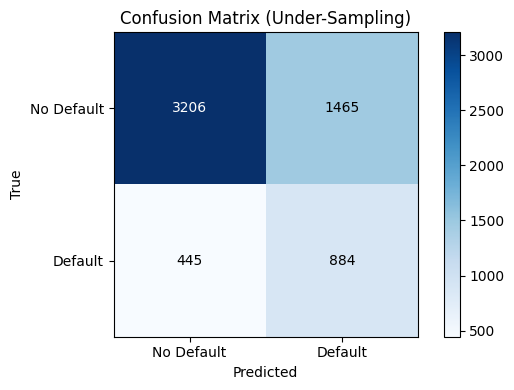

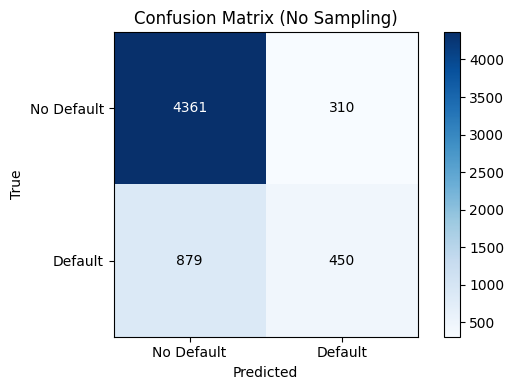

In [73]:
##KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Drop unnecessary columns
data.drop('ID', axis=1, inplace=True)

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for KNN with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Grid Search Cross Validation to find optimal hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtain the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# K-nearest Neighbors Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn_smote = best_estimator
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = knn_smote.predict(X_test)

# K-nearest Neighbors Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

knn_undersample = best_estimator
knn_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = knn_undersample.predict(X_test)

# K-nearest Neighbors Classifier without Sampling
knn = best_estimator
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix Plots
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['No Default', 'Default'])
    plt.yticks(tick_marks, ['No Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plot_confusion_matrix(y_test, y_pred_smote, 'Confusion Matrix (SMOTE)')
plot_confusion_matrix(y_test, y_pred_undersample, 'Confusion Matrix (Under-Sampling)')
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix (No Sampling)')

# Classification Report
print('Classification Report (SMOTE):')
print(classification_report(y_test, y_pred_smote))
print('Classification Report (Under-Sampling):')
print(classification_report(y_test, y_pred_undersample))
print('Classification Report (No Sampling):')
print(classification_report(y_test, y_pred))

# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (SMOTE):', accuracy_smote)
print('Accuracy (Under-Sampling):', accuracy_undersample)
print('Accuracy (No Sampling):', accuracy)

plt.show()

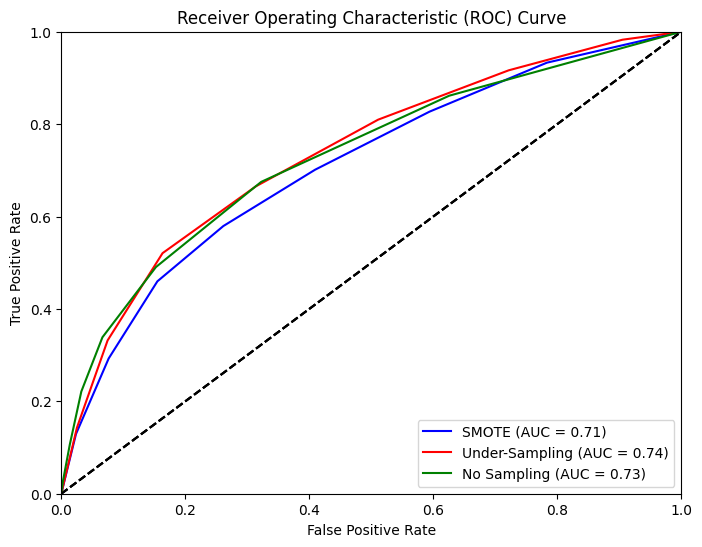

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4671
           1       0.39      0.58      0.46      1329

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.63      6000
weighted avg       0.76      0.70      0.72      6000

Classification Report (Under-Sampling):
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4671
           1       0.38      0.67      0.48      1329

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000

Classification Report (No Sampling):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4671
           1       0.59      0.34      0.43      1329

    accuracy                           0.80      6000
   macro avg       0

In [76]:
##KNeighborsClassifier -roc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for KNN with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Grid Search Cross Validation to find optimal hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtain the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# K-nearest Neighbors Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn_smote = best_estimator
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = knn_smote.predict(X_test)
y_proba_smote = knn_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_proba_smote)

# K-nearest Neighbors Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

knn_undersample = best_estimator
knn_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = knn_undersample.predict(X_test)
y_proba_undersample = knn_undersample.predict_proba(X_test)[:, 1]
auc_undersample = roc_auc_score(y_test, y_proba_undersample)

# K-nearest Neighbors Classifier without Sampling
knn = best_estimator
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

# ROC Curve Plots
def plot_roc_curve(fpr, tpr, auc_score, title, color):
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc_score:.2f})', color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
fpr_undersample, tpr_undersample, _ = roc_curve(y_test, y_proba_undersample)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_smote, tpr_smote, auc_smote, 'SMOTE', 'blue')
plot_roc_curve(fpr_undersample, tpr_undersample, auc_undersample, 'Under-Sampling', 'red')
plot_roc_curve(fpr, tpr, auc, 'No Sampling', 'green')

plt.show()

# Classification Report
print('Classification Report (SMOTE):')
print(classification_report(y_test, y_pred_smote))
print('Classification Report (Under-Sampling):')
print(classification_report(y_test, y_pred_undersample))
print('Classification Report (No Sampling):')
print(classification_report(y_test, y_pred))

# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (SMOTE):', accuracy_smote)
print('Accuracy (Under-Sampling):', accuracy_undersample)
print('Accuracy (No Sampling):', accuracy)


In [77]:
#GridSearchCV for KNN

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.7989501024518997


Accuracy (No Sampling): 0.8218333333333333
Accuracy (SMOTE): 0.7946666666666666
Accuracy (Under-Sampling): 0.7381666666666666
Classification Report (No Sampling):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4671
           1       0.66      0.40      0.50      1329

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4671
           1       0.54      0.52      0.53      1329

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000

Classification Report (Under-Sampling):
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      4671


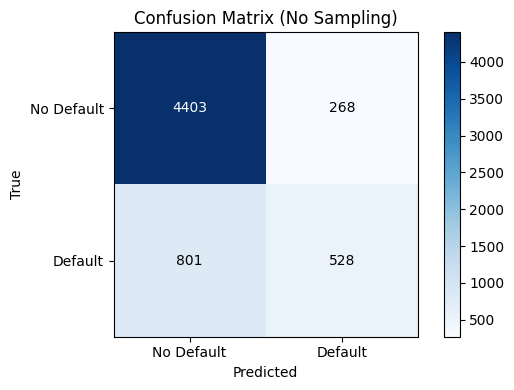

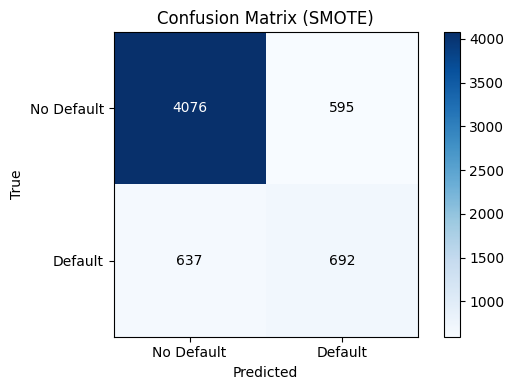

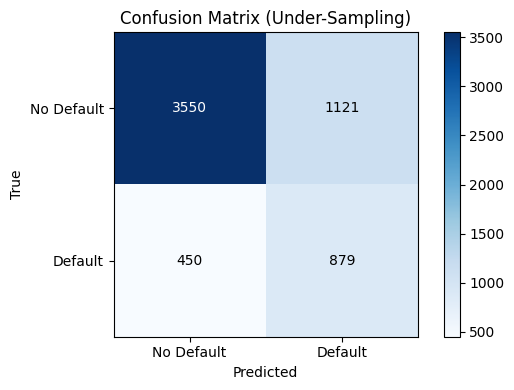

In [78]:
#Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Decision Tree Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the model on the training data (No Sampling)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (No Sampling):", accuracy)

# Fit the model on the training data (SMOTE)
random_forest_smote = RandomForestClassifier()
random_forest_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = random_forest_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy (SMOTE):", accuracy_smote)

# Fit the model on the training data (Under-Sampling)
random_forest_undersample = RandomForestClassifier()
random_forest_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = random_forest_undersample.predict(X_test)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
print("Accuracy (Under-Sampling):", accuracy_undersample)

# Generate classification report (No Sampling)
report = classification_report(y_test, y_pred)
print("Classification Report (No Sampling):\n", report)

# Generate classification report (SMOTE)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report (SMOTE):\n", report_smote)

# Generate classification report (Under-Sampling)
report_undersample = classification_report(y_test, y_pred_undersample)
print("Classification Report (Under-Sampling):\n", report_undersample)

# Generate confusion matrix (No Sampling)
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (No Sampling):\n", matrix)

# Generate confusion matrix (SMOTE)
matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix (SMOTE):\n", matrix_smote)

# Generate confusion matrix (Under-Sampling)
matrix_undersample = confusion_matrix(y_test, y_pred_undersample)
print("Confusion Matrix (Under-Sampling):\n", matrix_undersample)

# Plot Confusion Matrix (No Sampling)
plt.figure(figsize=(6, 4))
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (No Sampling)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, format(matrix[i, j]), ha='center', va='center',
                 color='white' if matrix[i, j] > matrix.max() / 2 else 'black')
plt.show()

# Plot Confusion Matrix (SMOTE)
plt.figure(figsize=(6, 4))
plt.imshow(matrix_smote, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SMOTE)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix_smote.shape[0]):
    for j in range(matrix_smote.shape[1]):
        plt.text(j, i, format(matrix_smote[i, j]), ha='center', va='center',
                 color='white' if matrix_smote[i, j] > matrix_smote.max() / 2 else 'black')
plt.show()

# Plot Confusion Matrix (Under-Sampling)
plt.figure(figsize=(6, 4))
plt.imshow(matrix_undersample, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Under-Sampling)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix_undersample.shape[0]):
    for j in range(matrix_undersample.shape[1]):
        plt.text(j, i, format(matrix_undersample[i, j]), ha='center', va='center',
                 color='white' if matrix_undersample[i, j] > matrix_undersample.max() / 2 else 'black')
plt.show()


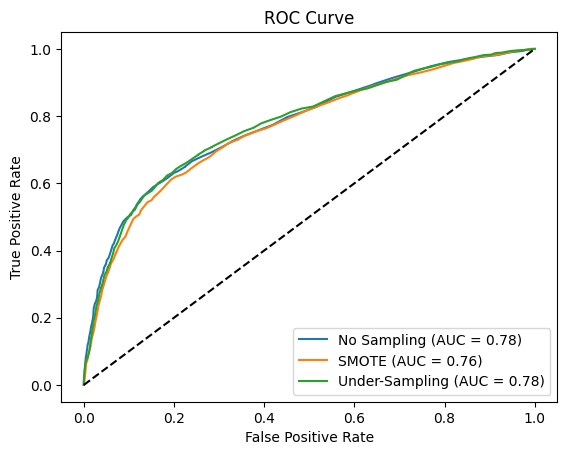

In [79]:
#Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Decision Tree Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the model on the training data (No Sampling)
random_forest.fit(X_train, y_train)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Fit the model on the training data (SMOTE)
random_forest_smote = RandomForestClassifier()
random_forest_smote.fit(X_train_smote, y_train_smote)
y_pred_proba_smote = random_forest_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)

# Fit the model on the training data (Under-Sampling)
random_forest_undersample = RandomForestClassifier()
random_forest_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_proba_undersample = random_forest_undersample.predict_proba(X_test)[:, 1]
auc_undersample = roc_auc_score(y_test, y_pred_proba_undersample)
fpr_undersample, tpr_undersample, thresholds_undersample = roc_curve(y_test, y_pred_proba_undersample)

# Plot ROC Curve
plt.plot(fpr, tpr, label='No Sampling (AUC = {:.2f})'.format(auc))
plt.plot(fpr_smote, tpr_smote, label='SMOTE (AUC = {:.2f})'.format(auc_smote))
plt.plot(fpr_undersample, tpr_undersample, label='Under-Sampling (AUC = {:.2f})'.format(auc_undersample))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


LDA with Over-Sampling (SMOTE)
Accuracy: 0.7813333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4671
           1       0.51      0.56      0.53      1329

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.78      0.79      6000

Confusion Matrix:
 [[3939  732]
 [ 580  749]]


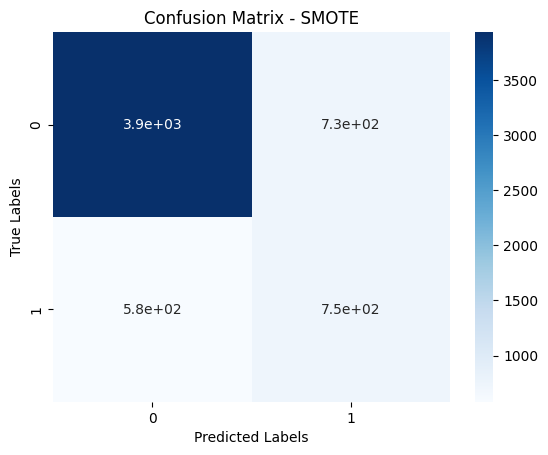

LDA with Under-Sampling
Accuracy: 0.7768333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      4671
           1       0.50      0.59      0.54      1329

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000

Confusion Matrix:
 [[3881  790]
 [ 549  780]]


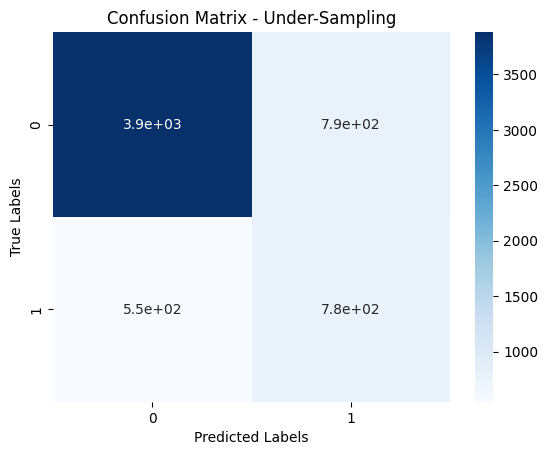

LDA with SMOTE and Under-Sampling
Accuracy: 0.7768333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      4671
           1       0.50      0.59      0.54      1329

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000

Confusion Matrix:
 [[3881  790]
 [ 549  780]]


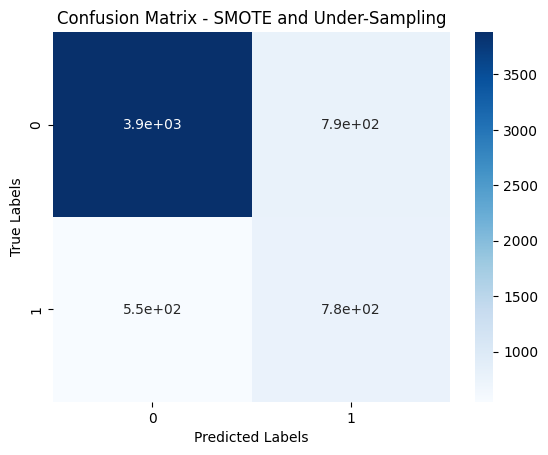

In [83]:
##LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Identify categorical columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the remaining numeric features
X = pd.concat([encoded_df, data.drop(categorical_columns, axis=1)], axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis (LDA) with Over-Sampling (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lda_smote = LinearDiscriminantAnalysis()
lda_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = lda_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_report_smote = classification_report(y_test, y_pred_smote)
confusion_matrix_smote = confusion_matrix(y_test, y_pred_smote)

print("LDA with Over-Sampling (SMOTE)")
print("Accuracy:", accuracy_smote)
print("Classification Report:\n", classification_report_smote)
print("Confusion Matrix:\n", confusion_matrix_smote)

# Plot Confusion Matrix for SMOTE
sns.heatmap(confusion_matrix_smote, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SMOTE')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Linear Discriminant Analysis (LDA) with Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

lda_undersample = LinearDiscriminantAnalysis()
lda_undersample.fit(X_train_undersample, y_train_undersample)

y_pred_undersample = lda_undersample.predict(X_test)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
classification_report_undersample = classification_report(y_test, y_pred_undersample)
confusion_matrix_undersample = confusion_matrix(y_test, y_pred_undersample)

print("LDA with Under-Sampling")
print("Accuracy:", accuracy_undersample)
print("Classification Report:\n", classification_report_undersample)
print("Confusion Matrix:\n", confusion_matrix_undersample)

# Plot Confusion Matrix for Under-Sampling
sns.heatmap(confusion_matrix_undersample, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Under-Sampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Linear Discriminant Analysis (LDA) with SMOTE and Under-Sampling
X_train_combined, y_train_combined = smote.fit_resample(X_train_undersample, y_train_undersample)

lda_combined = LinearDiscriminantAnalysis()
lda_combined.fit(X_train_combined, y_train_combined)

y_pred_combined = lda_combined.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_pred_combined)
classification_report_combined = classification_report(y_test, y_pred_combined)
confusion_matrix_combined = confusion_matrix(y_test, y_pred_combined)

print("LDA with SMOTE and Under-Sampling")
print("Accuracy:", accuracy_combined)
print("Classification Report:\n", classification_report_combined)
print("Confusion Matrix:\n", confusion_matrix_combined)

# Plot Confusion Matrix for SMOTE and Under-Sampling
sns.heatmap(confusion_matrix_combined, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SMOTE and Under-Sampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


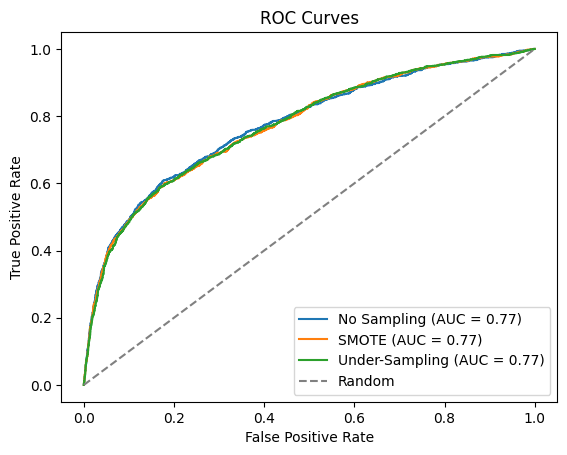

In [81]:
##ROC for LinearDiscriminantAnalysis

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Identify categorical columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the remaining numeric features
X = pd.concat([encoded_df, data.drop(categorical_columns, axis=1)], axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis (LDA) with Over-Sampling (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lda_smote = LinearDiscriminantAnalysis()
lda_smote.fit(X_train_smote, y_train_smote)

# Predict probabilities for positive class (1)
y_proba_smote = lda_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_proba_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

# Linear Discriminant Analysis (LDA) with Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

lda_undersample = LinearDiscriminantAnalysis()
lda_undersample.fit(X_train_undersample, y_train_undersample)

# Predict probabilities for positive class (1)
y_proba_undersample = lda_undersample.predict_proba(X_test)[:, 1]
fpr_undersample, tpr_undersample, thresholds_undersample = roc_curve(y_test, y_proba_undersample)
auc_undersample = roc_auc_score(y_test, y_proba_undersample)

# Linear Discriminant Analysis (LDA) without Sampling
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict probabilities for positive class (1)
y_proba = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curves
plt.plot(fpr, tpr, label='No Sampling (AUC = {:.2f})'.format(auc))
plt.plot(fpr_smote, tpr_smote, label='SMOTE (AUC = {:.2f})'.format(auc_smote))
plt.plot(fpr_undersample, tpr_undersample, label='Under-Sampling (AUC = {:.2f})'.format(auc_undersample))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [84]:
#LDA Gridsearchcv

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'shrinkage': None, 'solver': 'lsqr'}
Best Score: 0.8098672379662428


Accuracy (No Sampling): 0.8113333333333334
Accuracy (SMOTE): 0.6835
Accuracy (Under-Sampling): 0.696
Classification Report (No Sampling):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4671
           1       0.72      0.24      0.36      1329

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.62      6000
weighted avg       0.80      0.81      0.77      6000

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      4671
           1       0.38      0.68      0.49      1329

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000

Classification Report (Under-Sampling):
               precision    recall  f1-score   support

           0       0.88      0.71      0.78      4671
           1       0.39  

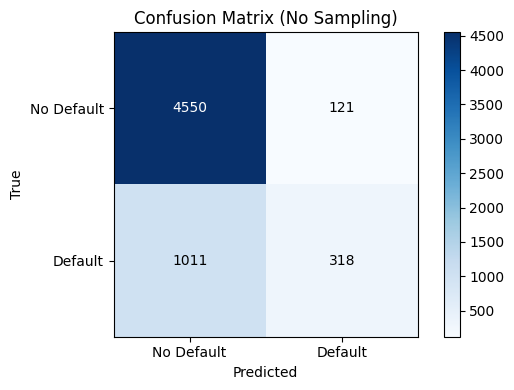

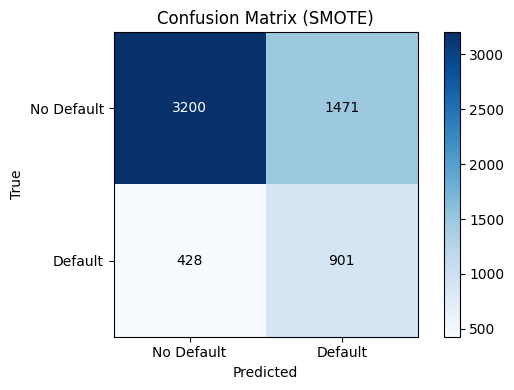

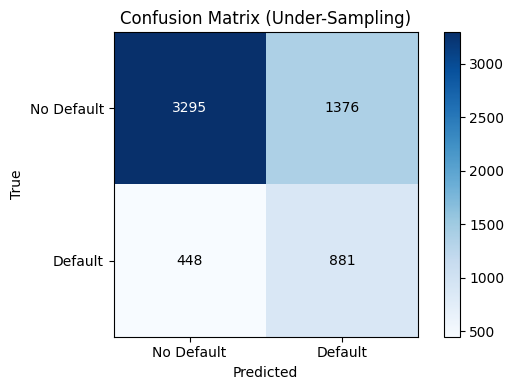

In [85]:
##LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Decision Tree Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train_scaled, y_train)

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Fit the model on the training data (No Sampling)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data (No Sampling)
y_pred = logreg.predict(X_test_scaled)

# Fit the model on the training data (SMOTE)
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_smote, y_train_smote)

# Fit the model on the training data (Under-Sampling)
logreg_undersample = LogisticRegression()
logreg_undersample.fit(X_train_undersample, y_train_undersample)

# Make predictions on the test data (SMOTE)
y_pred_smote = logreg_smote.predict(X_test_scaled)

# Make predictions on the test data (Under-Sampling)
y_pred_undersample = logreg_undersample.predict(X_test_scaled)

# Calculate accuracy (No Sampling)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (No Sampling):", accuracy)

# Calculate accuracy (SMOTE)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy (SMOTE):", accuracy_smote)

# Calculate accuracy (Under-Sampling)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
print("Accuracy (Under-Sampling):", accuracy_undersample)

# Generate classification report (No Sampling)
report = classification_report(y_test, y_pred)
print("Classification Report (No Sampling):\n", report)

# Generate classification report (SMOTE)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report (SMOTE):\n", report_smote)

# Generate classification report (Under-Sampling)
report_undersample = classification_report(y_test, y_pred_undersample)
print("Classification Report (Under-Sampling):\n", report_undersample)

# Generate confusion matrix (No Sampling)
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (No Sampling):\n", matrix)

# Generate confusion matrix (SMOTE)
matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix (SMOTE):\n", matrix_smote)

# Generate confusion matrix (Under-Sampling)
matrix_undersample = confusion_matrix(y_test, y_pred_undersample)
print("Confusion Matrix (Under-Sampling):\n", matrix_undersample)

# Plot Confusion Matrix (No Sampling)
plt.figure(figsize=(6, 4))
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (No Sampling)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, format(matrix[i, j]), ha='center', va='center',
                 color='white' if matrix[i, j] > matrix.max() / 2 else 'black')
plt.show()

# Plot Confusion Matrix (SMOTE)
plt.figure(figsize=(6, 4))
plt.imshow(matrix_smote, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SMOTE)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix_smote.shape[0]):
    for j in range(matrix_smote.shape[1]):
        plt.text(j, i, format(matrix_smote[i, j]), ha='center', va='center',
                 color='white' if matrix_smote[i, j] > matrix_smote.max() / 2 else 'black')
plt.show()

# Plot Confusion Matrix (Under-Sampling)
plt.figure(figsize=(6, 4))
plt.imshow(matrix_undersample, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Under-Sampling)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Default', 'Default'])
plt.yticks(tick_marks, ['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
for i in range(matrix_undersample.shape[0]):
    for j in range(matrix_undersample.shape[1]):
        plt.text(j, i, format(matrix_undersample[i, j]), ha='center', va='center',
                 color='white' if matrix_undersample[i, j] > matrix_undersample.max() / 2 else 'black')
plt.show()


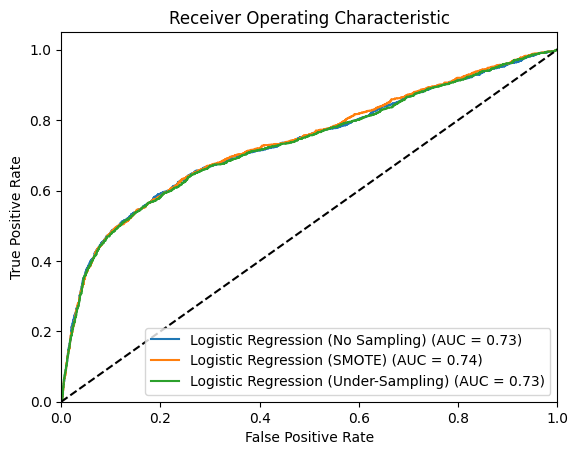

In [86]:
#Logistic Regression ROC

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Decision Tree Classifier with Over-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train_scaled, y_train)

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Fit the model on the training data (No Sampling)
logreg.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve (No Sampling)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Fit the model on the training data (SMOTE)
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve (SMOTE)
y_pred_prob_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Fit the model on the training data (Under-Sampling)
logreg_undersample = LogisticRegression()
logreg_undersample.fit(X_train_undersample, y_train_undersample)

# Predict probabilities for ROC curve (Under-Sampling)
y_pred_prob_undersample = logreg_undersample.predict_proba(X_test_scaled)[:, 1]
fpr_undersample, tpr_undersample, thresholds_undersample = roc_curve(y_test, y_pred_prob_undersample)
roc_auc_undersample = auc(fpr_undersample, tpr_undersample)

# Plot all ROC curves in one graph
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (No Sampling) (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_smote, tpr_smote, label='Logistic Regression (SMOTE) (AUC = %0.2f)' % roc_auc_smote)
plt.plot(fpr_undersample, tpr_undersample, label='Logistic Regression (Under-Sampling) (AUC = %0.2f)' % roc_auc_undersample)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Logistic Regression Gridsearchcv

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separate the features and target variable
X = data.drop('Payments', axis=1)
y = data['Payments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Best Score: 0.8088254844759325


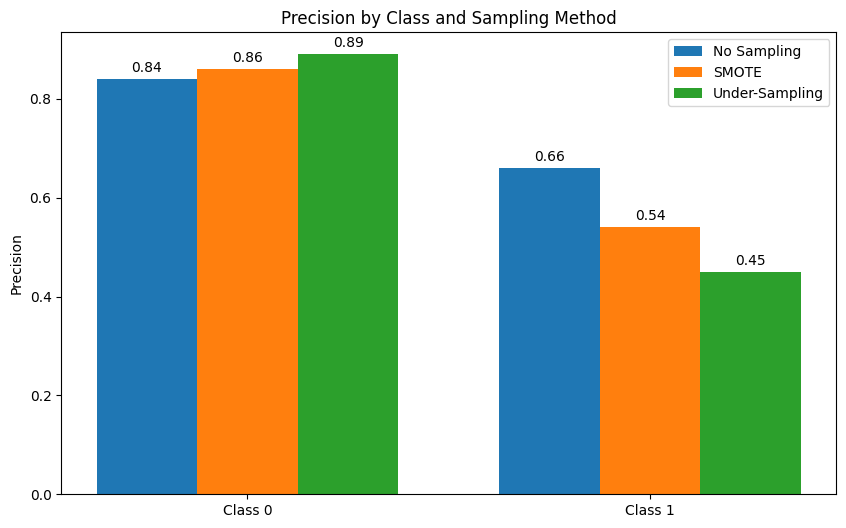

In [1]:
#Modeling Performance Results

import numpy as np
import matplotlib.pyplot as plt

# Classification Report (No Sampling)
precision_ns = [0.84, 0.66]
recall_ns = [0.94, 0.39]
f1score_ns = [0.89, 0.49]

# Classification Report (SMOTE)
precision_smote = [0.86, 0.54]
recall_smote = [0.88, 0.51]
f1score_smote = [0.87, 0.52]

# Classification Report (Under-Sampling)
precision_us = [0.89, 0.45]
recall_us = [0.77, 0.66]
f1score_us = [0.82, 0.53]

labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision
rects1 = ax.bar(x - width, precision_ns, width, label='No Sampling')
rects2 = ax.bar(x, precision_smote, width, label='SMOTE')
rects3 = ax.bar(x + width, precision_us, width, label='Under-Sampling')

ax.set_ylabel('Precision')
ax.set_title('Precision by Class and Sampling Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
